In [12]:
import pandas as pd

In [17]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt  
okt = Okt() 
import tensorflow as tf
import numpy as np
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt


import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
import matplotlib.pyplot as plt 
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [19]:
import seaborn as sns
import matplotlib.font_manager as fm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

---

### 데이터 불러오기

In [20]:
sort_total_years = pd.read_csv('sort_total_years.csv')

In [21]:
sort_like40 = sort_total_years[sort_total_years['year']=='1940y']
print('40년대 곡 개수 : ',len(sort_like40))
# sort_like40.head(2)

sort_like50 = sort_total_years[sort_total_years['year']=='1950y']
print('50년대 곡 개수 : ',len(sort_like50))
# sort_like50.head(2)

sort_like60 = sort_total_years[sort_total_years['year']=='1960y']
print('60년대 곡 개수 : ',len(sort_like60))
# sort_like60.head(2)

sort_like70 = sort_total_years[sort_total_years['year']=='1970y']
print('70년대 곡 개수 : ',len(sort_like70))
# sort_like70.head(2)

sort_like80 = sort_total_years[sort_total_years['year']=='1980y']
print('80년대 곡 개수 : ',len(sort_like80))
# sort_like80.head(2)

sort_like90 = sort_total_years[sort_total_years['year']=='1990y']
print('90년대 곡 개수 : ',len(sort_like90))
# sort_like90.head(2)

sort_like20 = sort_total_years[sort_total_years['year']=='2000y']
print('2000년대 곡 개수 : ',len(sort_like20))
# sort_like20.head(2)

sort_like2010 = sort_total_years[sort_total_years['year']=='2010y']
print('2010년대 곡 개수 : ',len(sort_like2010))
# sort_like2010.head(2)

40년대 곡 개수 :  98
50년대 곡 개수 :  98
60년대 곡 개수 :  88
70년대 곡 개수 :  179
80년대 곡 개수 :  339
90년대 곡 개수 :  572
2000년대 곡 개수 :  1028
2010년대 곡 개수 :  906


---

## 신조어  

In [22]:
from ckonlpy.tag import Twitter
twitter = Twitter()

In [24]:
len(add_words)

236

In [25]:
# 리스트에 담긴 단어만큼 사전에 추가
for i in range(len(add_words)):
    twitter.add_dictionary(add_words[i], 'Noun')

In [26]:
twitter.add_dictionary('아름다운', 'Adjective')
twitter.add_dictionary('외로운', 'Adjective')
twitter.add_dictionary('지나버린', 'Adjective')
twitter.add_dictionary('외로움', 'Noun')
twitter.add_dictionary('괴로움', 'Noun')

In [75]:
twitter.add_dictionary('찰랑거린다', 'Verb')
twitter.add_dictionary('내린다', 'Verb')
twitter.add_dictionary('울린다', 'Verb')
twitter.add_dictionary('들린다', 'Verb')
twitter.add_dictionary('흐린다', 'Verb')
twitter.add_dictionary('어린다', 'Verb')

In [ ]:
twitter.add_dictionary('마도로스', 'Noun')

### 불용어

In [27]:
 # 불용어 (가사 빈도수 높은 + 감정분류와 무관한 단어 추가 중)
stop_w = ['all','이렇게','네가','있는','니가','없는','너의','너무','그런',
          'oh','whoo','tuesday','내가','너를','나를','we','this','the','그렇게',
          'so','am','baby','and','can','you','much','me','for','go','in',
          '은', '는', '이', '가', '하','부터','처럼','까지',
          'know','no','of','let','my','수','너','내','나','그','난','봐',
          '돼','건','모든','에서','에게','싶어','잖아','어요','리리',
          '날','널','수','것','못','말','넌','젠','하나','정말','알','여기',
          '다시','하게','니까','같은','다가','아무','어도','가는','구나',
          '때','아','더','게','또','채','일','걸','누구','나는','너는','라면',
          '같아','있어','사랑','그대','우리','마음','사람',
          '의','가','보','들','좀','잘','걍','과','도','를','으로','우린','하지',
          '해도','하고','없어','않아','오동동','레이','짜기','까투리','마다','토요일',
          '자','에','와','한','하다','네','있다','나의','해','다','내게','왜',
          '거야','이제','그냥','했던','하는','지나','되어','가지']
# 우리 , 그대 , 지금 , 마음 , 사랑 , 사람

In [28]:
len(stop_w)

131

---

##  주요 키워드 추출
* 1940 / 1950 / 1960 / 1970 / 1980 / 1990 / 2000 / 2010

## 1940 년대

In [29]:
# like count 정렬 맞는지 다시 확인
sort_like40.head(2)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
0,191162,오빠는 풍각(風角)쟁이,박향림,유성기로 듣던 불멸의 명가수 - 박향림 편,1914,오빠는 풍각쟁이야 머 오빠는 심술쟁이야 머 난몰라 난몰라 내반찬 다 뺏어 먹는거...,https://image.bugsm.co.kr/album/images/200/101...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
1,80078168,애수의 소야곡,남인수,남인수 골든,937,운다고 옛사랑이 오리요만은 눈물로 달래보는 구슬픈 이밤 고요히 창을 열고 별빛...,https://image.bugsm.co.kr/album/images/200/800...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y


In [30]:
lyric40 = sort_like40.Lyric

### 토큰화

In [31]:
tagging_okt = []
for i in lyric40:
    tag_word = twitter.pos(i)
    tagging_okt.append(tag_word)

### 말뭉치 담기 (형용사, 명사, 동사)
* okt를 사용한 이유를 설명할 수 있을 듯 (명사, 형용사 등 morphs의 명확한 분리 후 원하는 형태소만 따로 담을 수 있다는 이점)
* sentencepiece에서는 형태소별로 구분 X

In [32]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

### 딕셔너리 생성 (단어, 빈도수 count)

In [33]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

## CountVectorizer

In [34]:
#max_features는 corpus중 빈도수가 가장 높은 순으로 해당 개수만큼만 뽑아냄 

In [35]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w) 
tdm = cv.fit_transform(corpus)

In [36]:
# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(6633, 1960)
1960


In [37]:
cv.get_feature_names()[:10]

['가거라', '가고', '가구', '가기', '가까웠다', '가나', '가네', '가노', '가느냐', '가는']

* 원래 사랑, 그대, 지금 이라는 단어를 분석에서 제외시켰었는데, <br> 해당 단어를 통해 맥락을 이해하고 노래의 분위기를 파악하는데 도움이 되는 단어라고 판단되어 불용어에서 제거했습니다.<br>
혹시 다른 의견이나 아이디어가 있다면 말씀해주세요!!! (불용어에서 추가하거나 삭제가 필요한 단어 등) 

In [38]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
322,노래,42
351,눈물,41
1037,소리,27
33,가슴,27
124,고향,27
141,구나,25
1226,어서,23
46,간다,21
76,거리,20
318,노다지,19


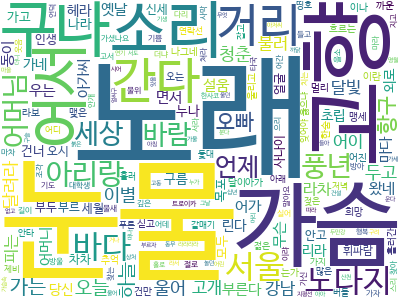

In [39]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

### 당연히 ...
사랑이라는 단어가 가장 많이 나올 것이기 때문에.. Top10 → Top11로 변경

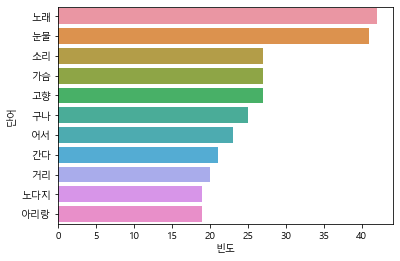

In [40]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

## 연도 칼럼 추가

In [41]:
# 1990 Top11 words
wc11['year'] = '1940y'
wc1940 = wc11
wc1940

,단어,빈도,year
322,노래,42,1940y
351,눈물,41,1940y
1037,소리,27,1940y
33,가슴,27,1940y
124,고향,27,1940y
141,구나,25,1940y
1226,어서,23,1940y
46,간다,21,1940y
76,거리,20,1940y
318,노다지,19,1940y


### 리스트에 담기

In [42]:
wc1940['단어'].unique().tolist()

['노래', '눈물', '소리', '가슴', '고향', '구나', '어서', '간다', '거리', '노다지', '아리랑']

In [43]:
top_word40 = wc1940['단어'].unique().tolist()

## 다음 연대 결과에 제외시키기 위해 불용어로 추가

In [44]:
stop_w40 = stop_w + top_word40

In [45]:
len(stop_w40)

142

---

## 1950 년대

In [46]:
# like count 정렬 맞는지 다시 확인
sort_like50.head(2)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
98,80078170,추억의 소야곡,남인수,남인수 골든,1061,다시 한 번 그 얼굴이 보고 싶어라 몸부림치며 울며 떠난 사람아 저 달이 밝혀...,https://image.bugsm.co.kr/album/images/200/800...,"['연도별 인기가요', '1950년대', '연대별', '국내', '연대별 음악']",1950y
99,1897305,열아홉 순정,이미자,이미자 골든베스트 2,930,보기만 하여도 울렁 생각만 하여도 울렁 수줍은 열 아홉 살 움트는 첫사랑을 몰라 ...,https://image.bugsm.co.kr/album/images/200/214...,"['연도별 인기가요', '1950년대', '연대별', '국내', '연대별 음악']",1950y


In [47]:
lyric50 = sort_like50.Lyric

In [48]:
tagging_okt = []
for i in lyric50:
    tag_word = twitter.pos(i)
    tagging_okt.append(tag_word)

In [49]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [50]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [51]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w40) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(6042, 1731)
1731


In [52]:
cv.get_feature_names()[:10]

['가고', '가기', '가나', '가냘퍼', '가네', '가느냐', '가느니', '가는', '가닥', '가더라']

In [53]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
533,리리,28
192,깜빡,21
1280,이별,19
1215,운다,18
523,레이,18
1049,아가씨,17
7,가는,17
537,린다,16
1208,우는,16
541,마다,15


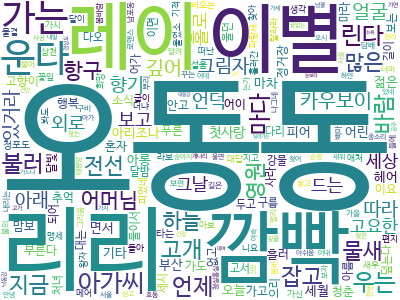

In [38]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

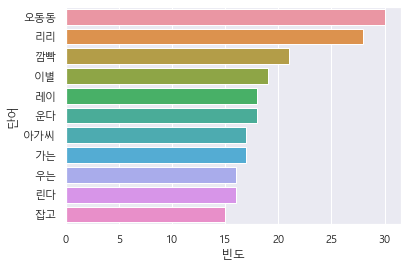

In [39]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [40]:
# 2000 Top11 words
wc11['year'] = '1950y'
wc1950 = wc11
wc1950

,단어,빈도,year
1170,오동동,30,1950y
533,리리,28,1950y
192,깜빡,21,1950y
1281,이별,19,1950y
523,레이,18,1950y
1216,운다,18,1950y
1049,아가씨,17,1950y
7,가는,17,1950y
1209,우는,16,1950y
537,린다,16,1950y


In [41]:
top_word50 = wc1950['단어'].unique().tolist()
stop_w50 = stop_w + top_word50
len(stop_w50)

141

---

## 1960 년대

In [59]:
# like count 정렬 맞는지 다시 확인
sort_like60.head(2)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
196,111110,안개낀 장충단 공원,배호,불멸(不滅)의 가수(歌手) 배호(裵湖) 전곡,2966,안개 낀 장충단 공원 누구를 찾아왔나 낙엽송 고목을 말 없이 쓸어 안고 울고만 있...,https://image.bugsm.co.kr/album/images/200/157...,"['연도별 인기가요', '1960년대', '연대별', '국내', '연대별 음악']",1960y
197,65527,카츄샤의 노래,송민도,송민도 히트전집,2580,커피 한 잔을 시켜놓고 그대 올 때를 기다려봐도 왠일인지 오지를 않네 내...,https://image.bugsm.co.kr/album/images/200/50/...,"['연도별 인기가요', '1960년대', '연대별', '국내', '연대별 음악']",1960y


In [43]:
lyric60 = sort_like60.Lyric

In [44]:
tagging_okt = []
for i in lyric60:
    tag_word = twitter.pos(i)
    tagging_okt.append(tag_word)

In [45]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [46]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [47]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w50) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(5606, 1467)
1467


In [48]:
cv.get_feature_names()[:10]

['가가', '가겠노', '가고', '가나', '가냘픈', '가네', '가느냐', '가는지', '가도', '가득']

In [85]:
sort_like60[sort_like60['Lyric'].str.contains('마도')]['Lyric']

254    무역선 오고가는 부산항구 제일 부두  죄많은 마도로스 이별이 야속더라  닷줄을 감으...
271    아 아 잘 있거라 부산항구야  미쓰 김도 잘 있어요 미쓰 리도 안녕히  온다는 기약...
276    등대불 깜빡이는 비 오는 항구  술취한 그 여인은 추억에 운다  테프를 던지면서 안...
Name: Lyric, dtype: object

In [49]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
19,가슴,37
1267,짜기,24
710,사나이,24
269,눈물,23
955,얼굴,21
32,간다,21
562,바람,20
796,소리,20
175,까투리,20
974,여자,19


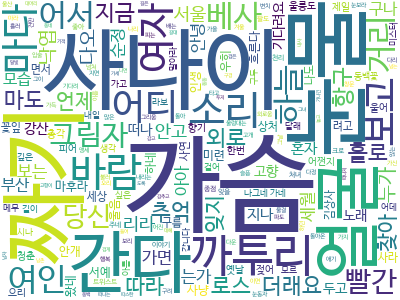

In [50]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

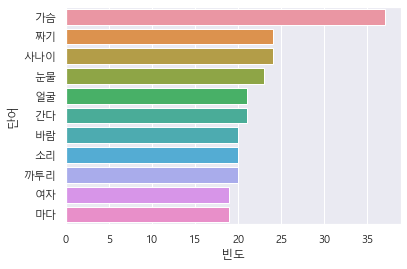

In [51]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [52]:
# 2010 Top11 words
wc11['year'] = '1960y'
wc1960 = wc11
wc1960

,단어,빈도,year
19,가슴,37,1960y
1267,짜기,24,1960y
710,사나이,24,1960y
269,눈물,23,1960y
955,얼굴,21,1960y
32,간다,21,1960y
562,바람,20,1960y
796,소리,20,1960y
175,까투리,20,1960y
974,여자,19,1960y


In [90]:
sort_like60[sort_like60['Lyric'].str.contains('마다')]['Lyric'].iloc[3]

'눈을 감고 걸어도 눈을 뜨고 걸어도  보이는 것은 초라한 모습 보고싶은 얼굴  거리마다 물결이 거리마다 발길이  휩쓸고 지나간 허황한 거리에  눈을 감고 걸어도 눈을 뜨고 걸어도  보이는 것은 초라한 모습 보고싶은 얼굴      거리마다 물결이 거리마다 발길이  휩쓸고 지나간 허황한 거리에   눈을 감고 걸어도 눈을 뜨고 걸어도  보이는 것은 초라한 모습  보고싶은 얼굴  보고 싶은 얼 굴    '

In [53]:
top_word60 = wc1960['단어'].unique().tolist()
stop_w60 = stop_w + top_word60
len(stop_w60)

141

---

## 1970 년대

In [54]:
# like count 정렬 맞는지 다시 확인
sort_like70.head(2)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
284,80009878,나 어떡해,샌드 페블즈(Sand Pebbless),대학가요제 Forever Golden Best (Best Of Best),8394,나 어떡해 너 갑자기 가버리면 나 어떡해 너를 잃고 살아갈까 나 어떡해 나를...,https://image.bugsm.co.kr/album/images/200/800...,"['국내', '7080', '1970년대', '락', '성인가요', '밴드', '그...",1970y
285,1114634,하얀 나비,김정호,하얀 나비 / 인생,8163,음 생각을 말아요 지나간 일들은 음 그리워 말아요 떠나갈 님인데 꽃잎은 시들어요...,https://image.bugsm.co.kr/album/images/200/113...,"['국내', '포크', '성인가요', '부모님', '통기타', '1970년대', '...",1970y


In [55]:
lyric70 = sort_like70.Lyric

In [56]:
tagging_okt = []
for i in lyric70:
    tag_word = twitter.pos(i)
    tagging_okt.append(tag_word)

In [57]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [58]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [59]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w60) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(14509, 2593)
2593


In [60]:
cv.get_feature_names()[:10]

['가가', '가거', '가겠소', '가고', '가고있는', '가까이', '가나', '가난', '가내', '가네']

In [103]:
sort_like70[sort_like70['Lyric'].str.contains('외로')]['Lyric'].iloc[1]

'비가 오면 생각나는 그 사람  언제나 말이 없던 그 사람  사랑의 괴로움을 몰래 감추고  떠난 사람 못 잊어서 울던 그 사람    그 어느 날 차안에서 내게 물었지  세상에서 제일 슬픈 게 뭐냐고  사랑보다 더 슬픈건 정이라며  고개를 떨구던 그 때 그 사람    외로운 병실에서 기타를 쳐주고  위로하며 다정했던 사랑한 사람  안녕이란 단 한마디 말도 없이  지금은 어디에서 행복할까  어쩌다 한번쯤은 생각해줄까  지금도 보고 싶은 그 때 그 사람      외로운 내 가슴에 살며시 다가와서  언제라도 감싸주던 다정했던 사람  그러니까 미워하며는 안되겠지  다시는 생각해서도 안되겠지  철없이 사랑인줄 알았었네  이제는 잊어야 할 그 때 그 사람  '

In [108]:
sort_like90[sort_like90['Lyric'].str.contains('지나')]['Lyric'].

807     한참 동안을 찾아가지 않은   저 언덕 너머 거리엔  오래 전 그 모습 그대로 넌 ...
834     사랑하는 사람을 보내야만 했던   모든 사람들에게 바칩니다    돌아보면 너무나 아...
835     그렇게 떠나간 널 보며 아무말도 하지 못했던 난   너의 새로운 그녀보다 아직 어린...
843     너를 처음 만난 날   소리 없이 밤새 눈은 내리고  끝도 없이 찾아드는 기다림  ...
844     모르지만 이젠 이해할수있어  네가 지금 이곳에 있는 이유를  언제까지나 날 어리게만...
                              ...                        
1342    시키는 대로 강요받고 살아온 내 삶엔   반 이상 억압이란 가시가 살아있어   왜자...
1346    넌 언제나 나의 곁에서 항상   꿈을 꾸는 그대 천사이길 바래   눈 내리던 어느 ...
1351    내게 얘기해봐 왜 그리 힘겨운거야   왜 넌 솔직하게 표현하지 못하는 거야   아무...
1355    말없이 다가온 조그만 그 모습   언제나 나에게 외로운 내 마음에   용기를 주었던...
1362    내 손에 뭔가 쥐여져있나  후에 무얼할수 있겠나    난 기다렸어   그리 오랬동안...
Name: Lyric, Length: 100, dtype: object

In [61]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
569,당신,87
2415,하늘,56
1531,아름,51
473,노래,50
940,모두,46
2436,하얀,46
530,다운,43
1341,생각,42
2503,행복,39
2309,친구,39


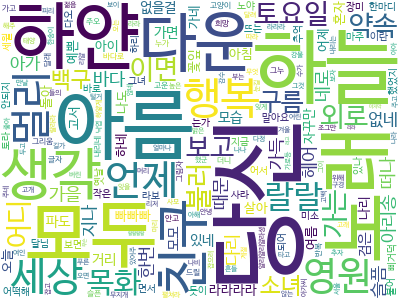

In [62]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

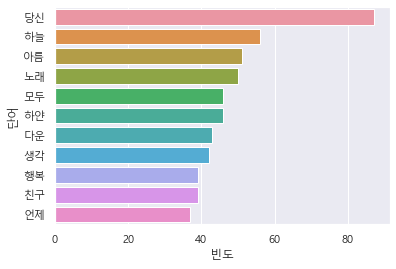

In [63]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [64]:
# 2010 Top11 words
wc11['year'] = '1970y'
wc1970 = wc11
wc1970

,단어,빈도,year
569,당신,87,1970y
2415,하늘,56,1970y
1531,아름,51,1970y
473,노래,50,1970y
940,모두,46,1970y
2436,하얀,46,1970y
530,다운,43,1970y
1341,생각,42,1970y
2503,행복,39,1970y
2309,친구,39,1970y


In [65]:
top_word70 = wc1970['단어'].unique().tolist()
stop_w70 = stop_w + top_word70
len(stop_w70)

141

---

## 1980 년대

In [66]:
lyric80 = sort_like80.Lyric

In [67]:
tagging_okt = []
for i in lyric80:
    tag_word = twitter.pos(i)
    tagging_okt.append(tag_word)

In [68]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])
            

In [69]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [70]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w70) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(29896, 3774)
3774


In [71]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
691,눈물,185
51,가슴,164
1336,모습,160
1494,바람,158
2225,아직,78
3338,추억,76
2073,슬픔,75
1978,세월,75
1990,소리,73
2508,영원,72


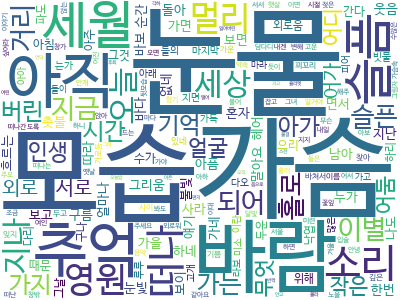

In [72]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()


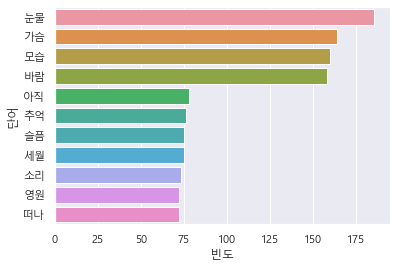

In [73]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [74]:
# 2010 Top11 words
wc11['year'] = '1980y'
wc1980 = wc11
wc1980


,단어,빈도,year
691,눈물,185,1980y
51,가슴,164,1980y
1336,모습,160,1980y
1494,바람,158,1980y
2225,아직,78,1980y
3338,추억,76,1980y
2073,슬픔,75,1980y
1978,세월,75,1980y
1990,소리,73,1980y
2508,영원,72,1980y


In [75]:
top_word80 = wc1980['단어'].unique().tolist()
stop_w80 = stop_w + top_word80
len(stop_w80)

141

---

## 1990 년대

In [76]:
lyric90 = sort_like90.Lyric

In [77]:
tagging_okt = []
for i in lyric90:
    tag_word = twitter.pos(i)
    tagging_okt.append(tag_word)

In [78]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [79]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [80]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w80) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(82748, 5000)
5000


In [81]:
cv.get_feature_names()[:10]

['가게', '가겠죠', '가겠지', '가고', '가고있어', '가기', '가까이', '가깝게', '가끔', '가나']

In [82]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
1520,모두,385
2249,세상,376
2766,언제,316
3891,지금,312
2182,생각,269
2384,시간,239
4719,행복,223
3219,위해,218
424,기억,215
535,나나,168


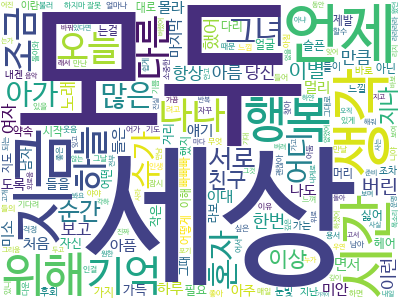

In [83]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

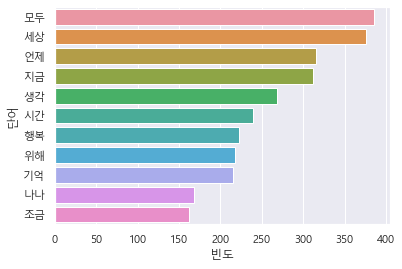

In [84]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [85]:
# 2010 Top11 words
wc11['year'] = '1990y'
wc1990 = wc11
wc1990


,단어,빈도,year
1520,모두,385,1990y
2249,세상,376,1990y
2766,언제,316,1990y
3891,지금,312,1990y
2182,생각,269,1990y
2384,시간,239,1990y
4719,행복,223,1990y
3219,위해,218,1990y
424,기억,215,1990y
535,나나,168,1990y


In [86]:
top_word90 = wc1990['단어'].unique().tolist()
stop_w90 = stop_w + top_word90
len(stop_w90)

141

---

## 2000 년대

In [87]:
lyric20 = sort_like20.Lyric

In [88]:
tagging_okt = []
for i in lyric20:
    tag_word = twitter.pos(i)
    tagging_okt.append(tag_word)

In [89]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [90]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [91]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w90) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(168626, 5000)
5000


In [92]:
cv.get_feature_names()[:10]
#
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
879,눈물,633
62,가슴,538
2923,아직,377
3374,오늘,355
4680,하늘,341
1733,모습,322
940,다른,299
3351,영원,297
394,그녀,277
4190,지나,270


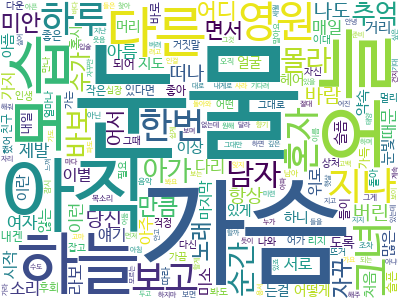

In [93]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

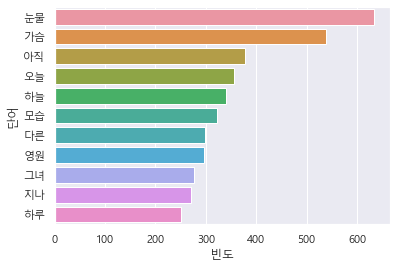

In [94]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [95]:
# 2010 Top11 words
wc11['year'] = '2000y'
wc2000 = wc11
wc2000


,단어,빈도,year
879,눈물,633,2000y
62,가슴,538,2000y
2923,아직,377,2000y
3374,오늘,355,2000y
4680,하늘,341,2000y
1733,모습,322,2000y
940,다른,299,2000y
3351,영원,297,2000y
394,그녀,277,2000y
4190,지나,270,2000y


In [96]:
top_word20 = wc2000['단어'].unique().tolist()
stop_w20 = stop_w + top_word20
len(stop_w20)

141

---

## 2010 년대

In [97]:
lyric2010 = sort_like2010.Lyric

In [98]:
tagging_okt = []
for i in lyric2010:
    tag_word = twitter.pos(i)
    tagging_okt.append(tag_word)

In [99]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])
            

In [100]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [101]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w20) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(148673, 5000)
5000


In [102]:
cv.get_feature_names()[:10]

['가가', '가게', '가겠지', '가고', '가기', '가까워', '가까이', '가끔', '가나', '가난']

In [103]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

,단어,빈도
2540,생각,517
2792,시간,445
4192,지금,440
2638,세상,342
1756,모두,301
3871,자꾸,300
506,기억,297
2165,보고,279
4851,행복,277
2714,순간,269


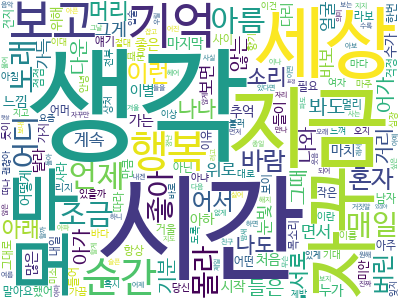

In [104]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

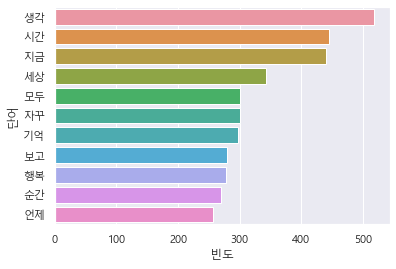

In [105]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [106]:
# 2010 Top11 words
wc11['year'] = '2010y'
wc2010 = wc11
wc2010

,단어,빈도,year
2540,생각,517,2010y
2792,시간,445,2010y
4192,지금,440,2010y
2638,세상,342,2010y
1756,모두,301,2010y
3871,자꾸,300,2010y
506,기억,297,2010y
2165,보고,279,2010y
4851,행복,277,2010y
2714,순간,269,2010y


In [107]:
# top_word2010 = wc2010['단어'].unique().tolist()
# stop_w += top_word2010
# len(stop_w)

### 연대별 단어 Top11 append
* 1940~ 2010

In [108]:
years_top_word = wc1940.append(wc1950)
years_top_word = years_top_word.append(wc1960)

years_top_word = years_top_word.append(wc1980)
years_top_word = years_top_word.append(wc1990)
years_top_word = years_top_word.append(wc2000)
years_top_word = years_top_word.append(wc2010)
len(years_top_word) 

77

In [109]:
years_top_word = years_top_word.append(wc1970)

In [110]:
len(years_top_word) 

88

In [111]:
years_top_word.reset_index(drop=True)
display(years_top_word.head(3),years_top_word.tail(3))

,단어,빈도,year
322,노래,42,1940y
351,눈물,41,1940y
1037,소리,27,1940y


,단어,빈도,year
2503,행복,39,1970y
2309,친구,39,1970y
1666,언제,37,1970y


In [112]:
# years_top_word.to_csv('years_top_word.csv',index=False)

In [113]:
## 전체코드

In [ ]:
# like count 정렬 맞는지 다시 확인
sort_like60.head(2)
#
lyric60 = sort_like60.Lyric
#
tagging_okt = []
for i in lyric60:
    tag_word = twitter.pos(i)
    tagging_okt.append(tag_word)
#
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])
            
#
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)
#
cv = CountVectorizer(max_features=5000, stop_words=stop_w) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))
#
cv.get_feature_names()[:10]
#
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

wc.sort_values('빈도', ascending=False).head(30)

# 

WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

#
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

#

# 2010 Top11 words
wc11['year'] = '1960y'
wc1960 = wc11
wc1960


#
top_word60 = wc1960['단어'].unique().tolist()
stop_w += top_word60
len(stop_w)